In [1]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display

In [51]:
# load file
input_file = ('../data/test_audio/8c795bad-5d11-4020-9f2f-7333a4c03313.wav')

[ 0.          0.          0.         ... -0.00038072 -0.0010773
  0.        ] 22050


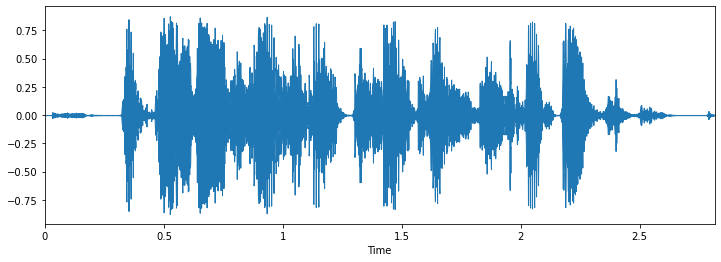

In [52]:
data, sampling_rate = librosa.load(input_file)
plt.figure(figsize=(12, 4))

print(data, sampling_rate)
librosa.display.waveplot(data, sr=sampling_rate)

In [68]:
def plot_audio(input_file):
    data, sampling_rate = librosa.load(input_file)
    plt.figure(figsize=(12, 4))
    plot_fig = librosa.display.waveplot(data, sr=sampling_rate)

    return(data, sampling_rate, plot_fig)    

(array([ 0.        ,  0.        ,  0.        , ..., -0.00038072,
        -0.0010773 ,  0.        ], dtype=float32),
 22050,
 <matplotlib.collections.PolyCollection at 0x7fa78d5ea9e8>)

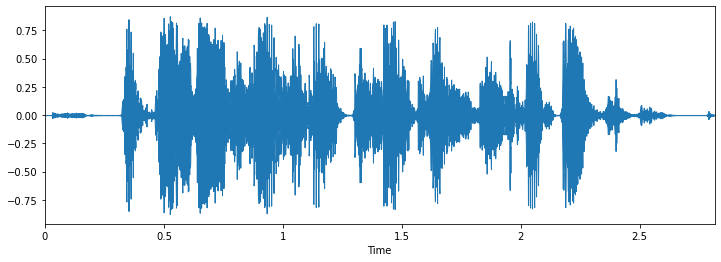

In [69]:
plot_audio(input_file)

# Parse Data


In [53]:
def input_parser(input_file):
   # handle exception to check if there isn't a file which is corrupted
   try:
      # extraction
      X, sample_rate = librosa.load(input_file, res_type='kaiser_fast') 
      # extract mfcc data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=128).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", input_file)
      return None
 
   feature = mfccs.tolist()
    
   return feature


In [54]:
value = input_parser(input_file)
value

[-265.8921203613281,
 127.0844497680664,
 -31.56550407409668,
 9.838298797607422,
 -12.000349998474121,
 15.999174118041992,
 -15.536371231079102,
 -7.188846588134766,
 -9.255759239196777,
 1.5747684240341187,
 16.06207847595215,
 -28.30736541748047,
 -5.4136176109313965,
 23.47007942199707,
 -5.881907939910889,
 -11.196463584899902,
 -0.09385671466588974,
 -6.798846244812012,
 -9.477035522460938,
 -12.204352378845215,
 -15.418811798095703,
 -9.55384635925293,
 -6.896906852722168,
 -12.01755428314209,
 -0.9302451610565186,
 8.637284278869629,
 -11.775835990905762,
 0.32228490710258484,
 -4.589066028594971,
 -5.615530967712402,
 5.559092044830322,
 -9.169424057006836,
 3.7458183765411377,
 -7.906445503234863,
 -1.7897981405258179,
 2.2054800987243652,
 -5.449367523193359,
 1.1323575973510742,
 -7.642101764678955,
 -2.7840209007263184,
 1.4503165483474731,
 -6.281203746795654,
 -2.6761796474456787,
 0.4789729714393616,
 -2.7406487464904785,
 2.0650248527526855,
 -1.959157943725586,
 -2.7

In [55]:
arr = np.array(value)
arr2d = np.reshape(arr, (1,128))



In [56]:
from joblib import load
model = load('../models/rf_model.sav')

In [ ]:
model.predict(arr2d)

In [61]:
#Probability of each value and order of classes

In [64]:
model.predict_proba(arr2d)

array([[0.12 , 0.235, 0.075, 0.125, 0.12 , 0.25 , 0.075]])

In [65]:
model.classes_

array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'sad', 'surprise'],
      dtype=object)

In [66]:
#function

In [67]:
def model_test(input_value):
    model = load('../models/rf_model.sav')
    feature = input_parser(input_file)
    arr = np.array(feature)
    arr2d = np.reshape(arr, (1,128))
    result = model.predict(arr2d)
    
    return result

In [60]:
model_test(value)

array(['sad'], dtype=object)